In [1]:
# loading important library 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data 

df = pd.read_csv('day.csv')

In [3]:
# checking raw data look
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# checking the shape of the data
df.shape

(730, 16)

In [5]:
# checking the data type and Null entries if any.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# checking all numerical daa
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Season variable required to change into proper naming convention and create dummy variables for it
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [8]:
# year varibale require to replace to 2018 and 2019 for EDA purpose only 
df.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

In [9]:
# Month variable required to change into proper naming convention and create dummy variables for it
df.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [10]:
# Holiday varibale doesn't require to replace to yes and no as for model we need to convert the Holiday to 
# dummy varaible but it's already having 0,1 coding - this column is good to use in the model as it is.


df.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [11]:
# Weekday variable required to change into proper naming convention and create dummy variables for it
df.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [12]:
# Workingday varibale doesn't require to replace to yes and no as for model we need to convert the Workingday to 
# dummy varaible but it's already having 0,1 coding - this column is good to use in the model as it is.

df.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [13]:
# Weathersit variable required to change into proper naming convention and create dummy variables for it
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

# Step 1 Data Preprations

## Create proper naming convention for the values of the following columns :
1. Season      :  (1:spring, 2:summer, 3:fall, 4:winter)
2. Month (Mnth):  (1:Jan, 2:Feb...........11:Nov,12:Dec)
3. Weekday     :  (0:Sun, 1:Mon.............5:Fri,6:Sat)
4. Weathersit  :  (1:Clear, 2:Cloudy, 3:Light_Rain, 4:Heavy_Rain) //took one abbrevation
5. year (yr).  :  (0: 2018, 1:2019)

Note : we are not changing the naming convention for 'holiday' and 'workingday' as these column are in 0,1 and can we treates as flag, we don't need to change it explcitly !!


In [14]:
# variable mapping for Season
#1. Season : (1:spring, 2:summer, 3:fall, 4:winter)


def svar(x):
    return x.map({
        1:"spring",
        2:"summer",
        3:"fall",
        4:"winter"
    })


df[['season']] = df[['season']].apply(svar)

In [15]:
#checking the changes are implemented correctly
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [16]:
# variable mapping for Month (Mnth)
# 2. Month (Mnth): (1:Jan, 2:Feb...........11:Nov,12:Dec)


def mvar(x):
    return x.map({
        1:'jan',
        2:'feb',
        3:'mar',
        4:'apr',
        5:'may',
        6:'jun',
        7:'jul',
        8:'aug',
        9:'sep',
        10:'oct',
        11:'nov',
        12:'dec'
    })

df[['mnth']] = df[['mnth']].apply(mvar)

In [17]:
#checking the changes are implemented correctly
df.mnth.value_counts()

jan    62
may    62
jul    62
aug    62
oct    62
dec    62
mar    62
sep    60
apr    60
nov    60
jun    60
feb    56
Name: mnth, dtype: int64

In [18]:
#variable mapping for weekday
#3. Weekday : (0:Sun, 1:Mon.............5:Fri,6:Sat)

def wvar(x):
    return x.map({
        0:"sun",
        1:"mon",
        2:"tue",
        3:"wed",
        4:"thu",
        5:"fri",
        6:"sat"
    })

df[["weekday"]] = df[["weekday"]].apply(wvar)

In [19]:
#checking the changes are implemented correctly
df.weekday.value_counts()

tue    105
mon    105
sun    104
fri    104
thu    104
sat    104
wed    104
Name: weekday, dtype: int64

In [20]:
# variable mapping for Weathersit 
# 4 . Weathersit  :  (1:Clear, 2:Cloudy, 3:Light_Rain, 4:Heavy_Rain) //took one abbrevation

def wtvar(x):
    return x.map({
        1:"clear",
        2:"cloudy",
        3:"light_rain",
        4:"heavy_rain"
    })

df[["weathersit"]]=df[["weathersit"]].apply(wtvar)


In [21]:
#checking the changes are implemented correctly
df.weathersit.value_counts()

clear         463
cloudy        246
light_rain     21
Name: weathersit, dtype: int64

In [22]:
# Variable mapping for Year
# 5. year (yr). : (0: 2018, 1:2019)

def myr(x):
    return x.map({
        0:'2018',
        1:'2019'
    })

df[["yr"]]= df[['yr']].apply(myr)

In [23]:
#checking the changes are implemented correctly
df.yr.value_counts()

2019    365
2018    365
Name: yr, dtype: int64

In [24]:
# checking out the overall data after the changes - how the data looks like.
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,jan,0,mon,1,cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,jan,0,tue,1,cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [25]:
# Checking for all numerical data summary
df.describe()

,instant,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [26]:
# As holiday and workingday are coming under the numberical data but it should not as it's catogorical data, 
#So checking out for the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null object
yr            730 non-null object
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(6), object(6)
memory usage: 91.4+ KB


In [27]:
# Changing the data type of 'Holiday' and 'Workingday' as it's categorical flag data of (0,1)
df.holiday = df.holiday.astype('str')
df.workingday = df.workingday.astype('str')

In [28]:
# re-checking the data type after doing the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null object
yr            730 non-null object
mnth          730 non-null object
holiday       730 non-null object
weekday       730 non-null object
workingday    730 non-null object
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(4), object(8)
memory usage: 91.4+ KB


# Step 2  :Data Visualization

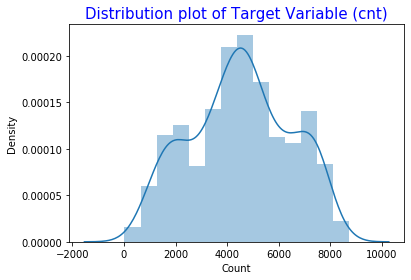

In [29]:
# checking the distribution of the Target variable Count (cnt)
sns.distplot(df.cnt)
plt.title("Distribution plot of Target Variable (cnt)", size=15, color='b')
plt.xlabel("Count")
plt.show()

### Observation : - Target variable 'Cnt' is normally distributed


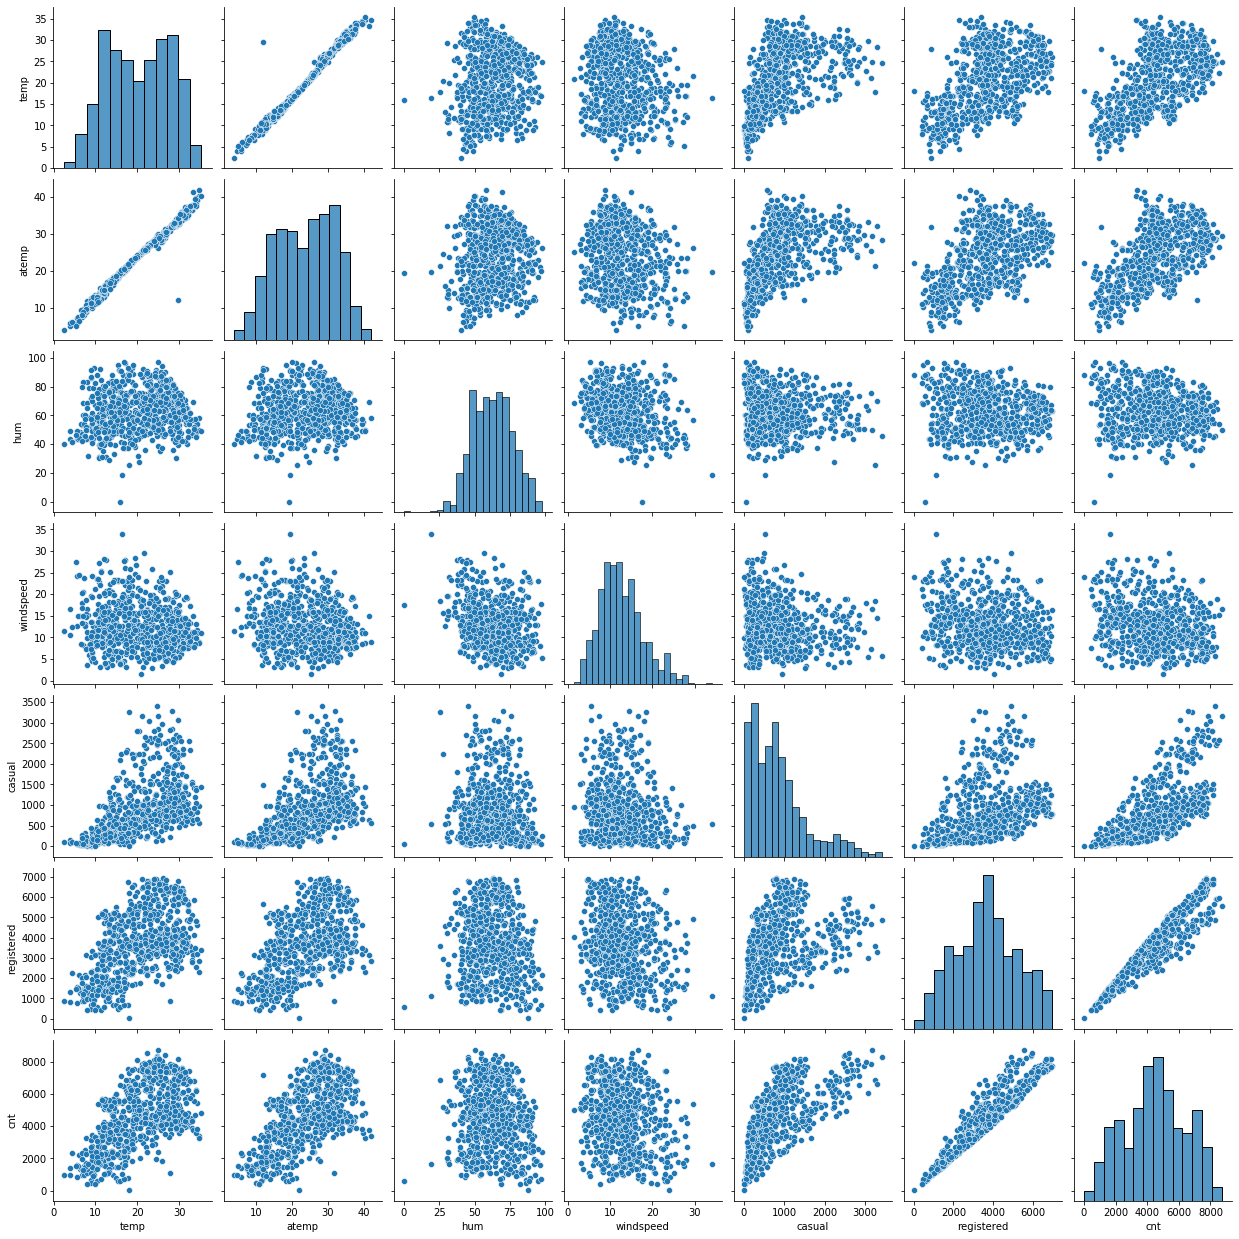

In [30]:
# Doing n X n chart plot for all numerical data to understand if there is any pattern
#plt.figure(figsize=(20,20))
sns.pairplot(df[['temp','atemp','hum','windspeed','casual','registered','cnt']])
#plt.title("Numerical Data Comparison (N x N) Graph")
plt.show()

## Observations  : - 

1. 'Temp' and 'atemp' variable are pretty linear co-relation
2.  no. of bike count ('cnt') are increasing with the increase in temp
3.  no. of bike count ('cnt') are increasing with the increase in atemp as well as temp and atemp have linear co-relation.


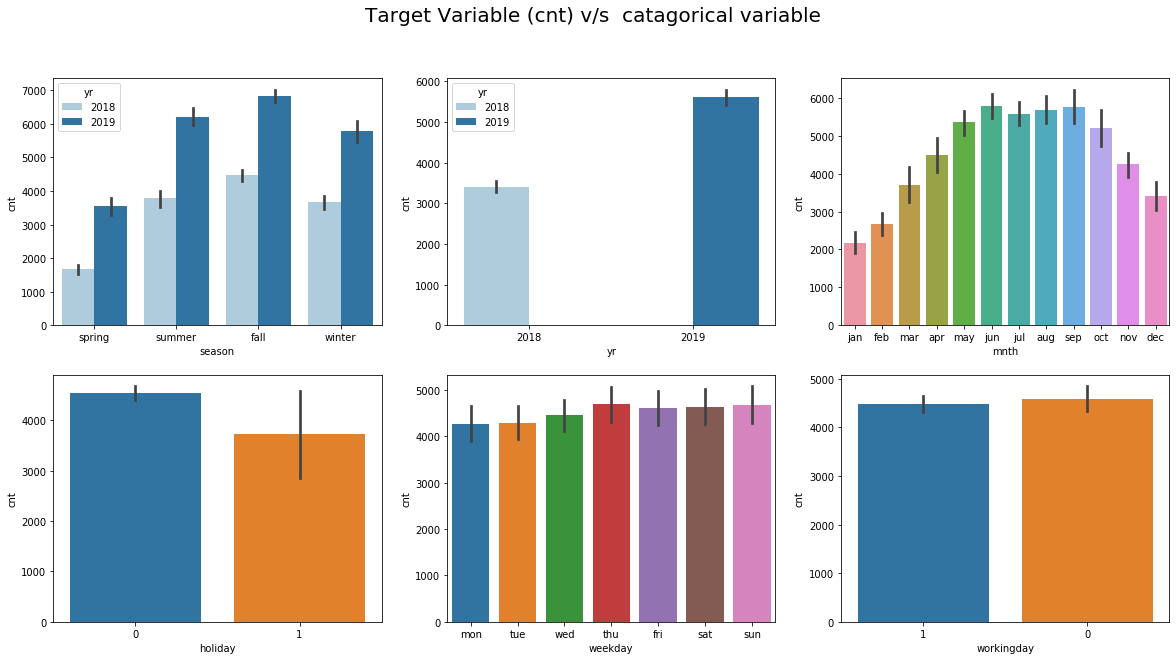

In [31]:
# Catagorical variable v/s Target varible 

plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.barplot(x=df.season,y=df.cnt,hue=df.yr,palette='Paired')
plt.subplot(2,3,2)
sns.barplot(x=df.yr,y=df.cnt,hue=df.yr,palette='Paired')
plt.subplot(2,3,3)
sns.barplot(x=df.mnth,y=df.cnt)
plt.subplot(2,3,4)
sns.barplot(x=df.holiday,y=df.cnt)
plt.subplot(2,3,5)
sns.barplot(x=df.weekday,y=df.cnt)
plt.subplot(2,3,6)
sns.barplot(x=df.workingday,y=df.cnt)

plt.suptitle("Target Variable (cnt) v/s  catagorical variable", size=20)
plt.show()

## Observations : - 

1. Fall season has heighest number of bike rentals
2. 50% + growth rate in bike rental in year 2019 as compare to 2018
3. Bike rental start increasing from Jan to Jun
4. Bike rental count start declining in the last quarter (Oct - Dec)
5. We have around 10%+ less bike rental on holidays
6. Thursday have higher number of bike rentals as compare to other days but nothing significant here.
7. Bike rental is almost similar weather it's working day or not.

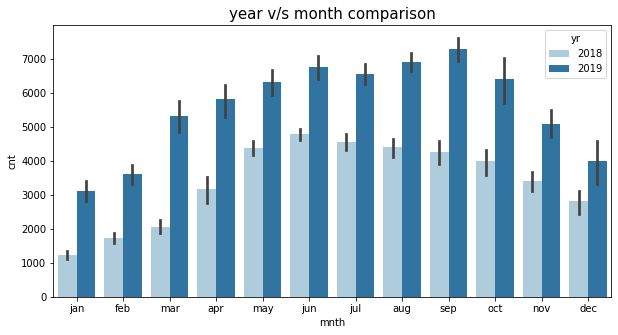

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(df.mnth,df.cnt,hue=df.yr,palette='Paired')
plt.title("year v/s month comparison", size = 15)
plt.show()

## Observation :-

In year 2018 the up cycle was from jan to jun and then start declining but pattern change in year 2019 as upcyle increase by 3 additional month from jan to sep and then declining for just last three months.

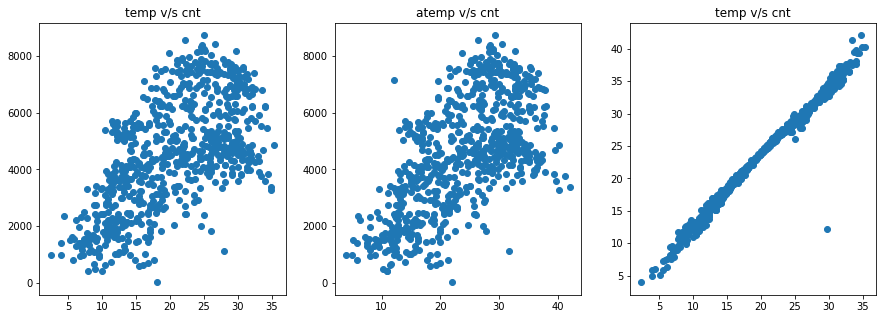

In [33]:
# re-assuring the relationship b/w temp, atemp and target variable 'cnt'


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)

plt.title("temp v/s cnt")
plt.scatter(df.temp,df.cnt)

plt.subplot(1,3,2)
plt.title("atemp v/s cnt")
plt.scatter(df.atemp,df.cnt)

plt.subplot(1,3,3)

plt.title("temp v/s cnt")


plt.scatter(df.temp,df.atemp)
plt.show()

## Observation : -
temp and atemp distribution is quiet similar and we may drop any of the variable as they are higly corelated.

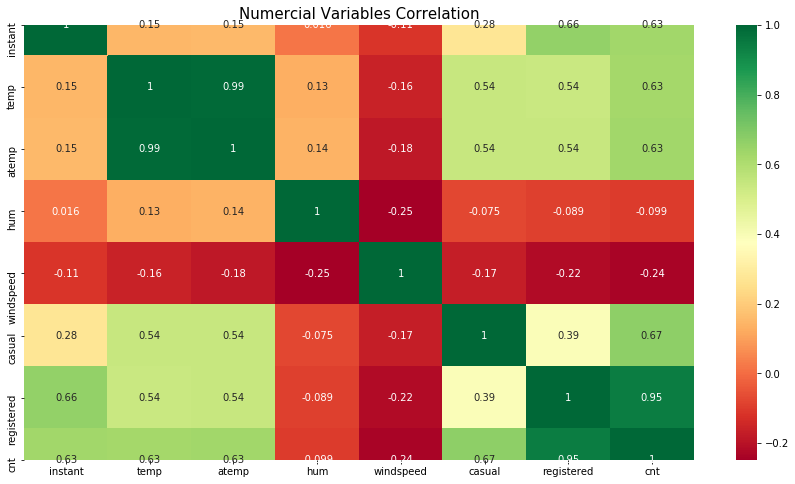

In [34]:
# Creating heatmap for all the numercial variable to check the colinearity b/w the variables
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.title("Numercial Variables Correlation",size=15)
plt.show()

## Observation : 

- 'Cnt' is the derived column from the 'registered' and 'casual' and highly likely to have strong relationship as well, which we can clearely see fro the heat map as well.
- Temp and Atemp as we have observed from the heatmap as well it's very high co-related.
- Windspeed is negatively corelated to the cnt columns, which indicated if windspeed increases bike rent decreases 
- Similary, for humidity as well it has negative co-relation.

## 1. Create dummy variable for the following columns :

1. Season
2. Month (mnth)
3. Weekday
4. year (yr)
5. Weathersit



In [35]:
# columns which required dummy variables except weathersit
df_categorical_set1= df[['season','mnth','weekday','yr']]

In [36]:
# Getting the dummy values
df_dummies = pd.get_dummies(df_categorical_set1, drop_first=True)
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,yr_2019
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# droping the previous columns for which we created dummies
df = df.drop(list(df_categorical_set1.columns), axis=1)

In [38]:
# adding the new dummy columns
df = pd.concat([df, df_dummies], axis=1)

In [39]:
# validating the above steps
df.head()

,instant,dteday,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,yr_2019
0,1,01-01-2018,0,1,cloudy,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,1,0,0,0,0,0,0
1,2,02-01-2018,0,1,cloudy,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,0,1,0,0
2,3,03-01-2018,0,1,clear,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,0,1,0
3,4,04-01-2018,0,1,clear,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,1,0,0,0
4,5,05-01-2018,0,1,clear,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,0,0


### Dummy variable for Set2 contains only weathersit as on disctionary it says it should have 4 types of input :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

but on data set it contains only 3 as of now the 4th entry might be comin in future so to balance k-1 dummies we are not going to use drop_first=true

In [40]:
# another category data
df_categorical_set2 = df[['weathersit']]

In [41]:
# creating dummy values
df_dummies = pd.get_dummies(df_categorical_set2)
df_dummies.head()

,weathersit_clear,weathersit_cloudy,weathersit_light_rain
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [42]:
# dropping previous column
df = df.drop(list(df_categorical_set2.columns), axis=1)

In [43]:
# adding new dummy column
df = pd.concat([df, df_dummies], axis=1)

In [44]:
# validating the previous steps
df.head()

,instant,dteday,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,yr_2019,weathersit_clear,weathersit_cloudy,weathersit_light_rain
0,1,01-01-2018,0,1,14.110847,18.18125,80.5833,10.749882,331,654,...,1,0,0,0,0,0,0,0,1,0
1,2,02-01-2018,0,1,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,1,0,0,0,1,0
2,3,03-01-2018,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,1,0,1,0,0
3,4,04-01-2018,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,1,0,0,0,1,0,0
4,5,05-01-2018,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,1,0,0


In [45]:
# converting the data type
df.holiday = df.holiday.astype(int)

In [46]:
# converting the data type
df.workingday = df.workingday.astype(int)

In [47]:
# validating the above step
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
instant                  730 non-null int64
dteday                   730 non-null object
holiday                  730 non-null int64
workingday               730 non-null int64
temp                     730 non-null float64
atemp                    730 non-null float64
hum                      730 non-null float64
windspeed                730 non-null float64
casual                   730 non-null int64
registered               730 non-null int64
cnt                      730 non-null int64
season_spring            730 non-null uint8
season_summer            730 non-null uint8
season_winter            730 non-null uint8
mnth_aug                 730 non-null uint8
mnth_dec                 730 non-null uint8
mnth_feb                 730 non-null uint8
mnth_jan                 730 non-null uint8
mnth_jul                 730 non-null uint8
mnth_jun                 730 non-null uint8
mnth_m

In [48]:
df.describe()

,instant,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,yr_2019,weathersit_clear,weathersit_cloudy,weathersit_light_rain
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849,...,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.500000,0.634247,0.336986,0.028767
std,210.877136,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647,...,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.500343,0.481971,0.473004,0.167266
min,1.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.250000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,365.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000
75%,547.750000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,730.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 3 - Removing unnecessary columns

In [49]:
# removing Instant Column as this just index
# removing date column as month and week are alredy there and as per problem statement we don't need it.
# removing atemp column as it's very much similar to temp 

df.drop(['instant','dteday','atemp','registered','casual'],axis=1,inplace=True)

In [50]:
# validating the above step
df.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,...,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,yr_2019,weathersit_clear,weathersit_cloudy,weathersit_light_rain
0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
df.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,...,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,yr_2019,weathersit_clear,weathersit_cloudy,weathersit_light_rain
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.028767,0.690411,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.084932,...,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.500000,0.634247,0.336986,0.028767
std,0.167266,0.462641,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.278971,...,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.500343,0.481971,0.473004,0.167266
min,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 4 : Pre-Modeling (Test/Train Split + Scaling) 

In [52]:
# loading the library
from sklearn.model_selection import train_test_split

In [53]:
# spliting up the data to train n test
np.random.seed(0)
Xtrain, Xtest = train_test_split(df, train_size=0.7,random_state=100)

In [54]:
# validating the above steps
Xtrain.shape

(510, 30)

In [55]:
# validating the above steps
Xtest.shape

(220, 30)

In [56]:
# columns which required scaling
Xcol = list(df[['temp','hum','windspeed','cnt']].columns)
Xcol

['temp', 'hum', 'windspeed', 'cnt']

In [57]:
# scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
Xtrain[Xcol]= sc.fit_transform(Xtrain[Xcol])
Xtest[Xcol] = sc.transform(Xtest[Xcol])

In [58]:
# validating the scaling result max should be 1
Xtrain.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,...,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,yr_2019,weathersit_clear,weathersit_cloudy,weathersit_light_rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,...,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.507843,0.625490,0.345098,0.029412
std,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,...,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.500429,0.484471,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
# y = aX + b
# y (Target Variable )    <----   cnt
# X (independent variable) <----  df except cnt

ytrain = Xtrain.cnt
Xtrain = Xtrain.drop('cnt', axis=1)


# Step 5 Modeling

In [60]:
# loading library
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [61]:
lm = LinearRegression()

In [62]:
# fitting the model
lm.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
# using the RFE method for model optimization
rfe = RFE(lm,18)
rfe = rfe.fit(Xtrain,ytrain)

In [64]:
# RFE provides the top list of columns 
list(zip(Xtrain.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 9),
 ('mnth_mar', False, 12),
 ('mnth_may', False, 6),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 10),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 5),
 ('weekday_sat', False, 2),
 ('weekday_sun', False, 3),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 4),
 ('weekday_wed', False, 8),
 ('yr_2019', True, 1),
 ('weathersit_clear', True, 1),
 ('weathersit_cloudy', True, 1),
 ('weathersit_light_rain', True, 1)]

In [65]:
# list of columns provided the RFE
col = Xtrain.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_nov', 'mnth_sep', 'yr_2019', 'weathersit_clear',
       'weathersit_cloudy', 'weathersit_light_rain'],
      dtype='object')

In [66]:
# assigning it to new variable
Xtrain_rfe = Xtrain[col]

In [67]:
# using different linear regression model to validate the results

import statsmodels.api as sm
Xtrain_sm = sm.add_constant(Xtrain_rfe)
lm = sm.OLS(ytrain,Xtrain_sm).fit()   

In [68]:
# provides the model summary
lm.summary()
# Observation :- R square, Adjusted R Square and p values looks good as of now.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.4
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.39e-188
Time:                        21:20:19   Log-Likelihood:                 517.84
No. Observations:                 510   AIC:                            -999.7
Df Residuals:                     492   BIC:                            -923.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1806      0.030      6.030      0.000       0.122       0.239
holiday                  -0.1032      0.026     -3.902      0.000      -0.155      -0.051
workingday               -0.0191      0.009     -2.099      0.036      -0.037      -0.001
temp                      0.4632      0.038     12.160      0.000       0.388       0.538
hum                      -0.1541      0.038     -4.083      0.000      -0.228      -0.080
windspeed                -0.1891      0.026     -7.364      0.000      -0.240      -0.139
season_spring            -0.0523      0.022     -2.380      0.018      -0.095      -0.009
season_summer             0.0394      0.015      2.563      0.011       0.009       0.070
season_winter             0.1006      0.018      5.603      0.000       0.065       0.136
mnth_dec                 -0.0461      0.018     -2.515      0.012      -0.082      -0.010
mnth_feb                 -0.0347      0.022     -1.603      0.109      -0.077       0.008
mnth_jan                 -0.0622      0.021     -2.903      0.004      -0.104      -0.020
mnth_jul                 -0.0546      0.018     -3.005      0.003      -0.090      -0.019
mnth_nov                 -0.0427      0.019     -2.253      0.025      -0.080      -0.005
mnth_sep                  0.0733      0.017      4.356      0.000       0.040       0.106
yr_2019                   0.2308      0.008     28.673      0.000       0.215       0.247
weathersit_clear          0.1627      0.011     14.494      0.000       0.141       0.185
weathersit_cloudy         0.1056      0.013      8.280      0.000       0.081       0.131
weathersit_light_rain    -0.0877      0.022     -3.985      0.000      -0.131      -0.044
==============================================================================
Omnibus:                       76.549   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.504
Skew:                          -0.787   Prob(JB):                     1.05e-39
Kurtosis:                       5.443   Cond. No.                     6.03e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.74e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [69]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = Xtrain_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# Observation :- VIF is too high for weathersit_clear and weathersit_cloudy

,Features,VIF
15,weathersit_clear,54.93
16,weathersit_cloudy,35.18
5,season_spring,5.69
2,temp,4.73
17,weathersit_light_rain,4.32
7,season_winter,3.84
6,season_summer,2.82
10,mnth_jan,2.37
3,hum,1.94
9,mnth_feb,1.86


In [70]:
# we are removing one variable first with the highest VIF which means it has highest muli-co-linearity b/w variables
col = col.drop('weathersit_clear')

In [71]:
# validating the previous step
col

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_nov', 'mnth_sep', 'yr_2019', 'weathersit_cloudy',
       'weathersit_light_rain'],
      dtype='object')

In [72]:
# re-running the model
Xtrain_rfe = Xtrain[col]
import statsmodels.api as sm
Xtrain_sm = sm.add_constant(Xtrain_rfe)
lm = sm.OLS(ytrain,Xtrain_sm).fit()   
lm.summary()

# Observation :- R square, Adjusted R Square and p values looks good as of now apart from mnth_feb

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.4
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.39e-188
Time:                        21:20:19   Log-Likelihood:                 517.84
No. Observations:                 510   AIC:                            -999.7
Df Residuals:                     492   BIC:                            -923.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3433      0.037      9.270      0.000       0.271       0.416
holiday                  -0.1032      0.026     -3.902      0.000      -0.155      -0.051
workingday               -0.0191      0.009     -2.099      0.036      -0.037      -0.001
temp                      0.4632      0.038     12.160      0.000       0.388       0.538
hum                      -0.1541      0.038     -4.083      0.000      -0.228      -0.080
windspeed                -0.1891      0.026     -7.364      0.000      -0.240      -0.139
season_spring            -0.0523      0.022     -2.380      0.018      -0.095      -0.009
season_summer             0.0394      0.015      2.563      0.011       0.009       0.070
season_winter             0.1006      0.018      5.603      0.000       0.065       0.136
mnth_dec                 -0.0461      0.018     -2.515      0.012      -0.082      -0.010
mnth_feb                 -0.0347      0.022     -1.603      0.109      -0.077       0.008
mnth_jan                 -0.0622      0.021     -2.903      0.004      -0.104      -0.020
mnth_jul                 -0.0546      0.018     -3.005      0.003      -0.090      -0.019
mnth_nov                 -0.0427      0.019     -2.253      0.025      -0.080      -0.005
mnth_sep                  0.0733      0.017      4.356      0.000       0.040       0.106
yr_2019                   0.2308      0.008     28.673      0.000       0.215       0.247
weathersit_cloudy        -0.0571      0.010     -5.453      0.000      -0.078      -0.037
weathersit_light_rain    -0.2504      0.026     -9.513      0.000      -0.302      -0.199
==============================================================================
Omnibus:                       76.549   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.504
Skew:                          -0.787   Prob(JB):                     1.05e-39
Kurtosis:                       5.443   Cond. No.                         23.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = Xtrain_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#Observation :- hum and temp has too high vif, we need to remove one by one and check again

,Features,VIF
3,hum,32.41
2,temp,18.49
5,season_spring,5.48
4,windspeed,4.77
7,season_winter,4.10
1,workingday,3.70
6,season_summer,2.85
10,mnth_jan,2.38
15,weathersit_cloudy,2.37
14,yr_2019,2.09


In [74]:
col = col.drop('hum')

In [75]:
# re-fitting the model after dropping the humidity variable ('hum')
Xtrain_rfe = Xtrain[col]
import statsmodels.api as sm
Xtrain_sm = sm.add_constant(Xtrain_rfe)
lm = sm.OLS(ytrain,Xtrain_sm).fit()   
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.1
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          1.17e-185
Time:                        21:20:19   Log-Likelihood:                 509.34
No. Observations:                 510   AIC:                            -984.7
Df Residuals:                     493   BIC:                            -912.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2757      0.034      8.194      0.000       0.210       0.342
holiday                  -0.1058      0.027     -3.940      0.000      -0.159      -0.053
workingday               -0.0220      0.009     -2.382      0.018      -0.040      -0.004
temp                      0.4212      0.037     11.306      0.000       0.348       0.494
windspeed                -0.1606      0.025     -6.397      0.000      -0.210      -0.111
season_spring            -0.0611      0.022     -2.749      0.006      -0.105      -0.017
season_summer             0.0322      0.016      2.073      0.039       0.002       0.063
season_winter             0.0864      0.018      4.826      0.000       0.051       0.122
mnth_dec                 -0.0540      0.018     -2.917      0.004      -0.090      -0.018
mnth_feb                 -0.0375      0.022     -1.707      0.088      -0.081       0.006
mnth_jan                 -0.0700      0.022     -3.227      0.001      -0.113      -0.027
mnth_jul                 -0.0496      0.018     -2.696      0.007      -0.086      -0.013
mnth_nov                 -0.0437      0.019     -2.272      0.023      -0.082      -0.006
mnth_sep                  0.0668      0.017      3.922      0.000       0.033       0.100
yr_2019                   0.2347      0.008     28.900      0.000       0.219       0.251
weathersit_cloudy        -0.0818      0.009     -9.425      0.000      -0.099      -0.065
weathersit_light_rain    -0.2936      0.024    -11.991      0.000      -0.342      -0.245
==============================================================================
Omnibus:                       79.339   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.435
Skew:                          -0.806   Prob(JB):                     4.44e-42
Kurtosis:                       5.523   Cond. No.                         22.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = Xtrain_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# Observation :- we still have temp with high VIF (>5), we need to drop it and re-fit the model

,Features,VIF
2,temp,6.19
3,windspeed,4.69
4,season_spring,4.45
1,workingday,3.59
6,season_winter,3.12
5,season_summer,2.33
9,mnth_jan,2.23
13,yr_2019,2.08
8,mnth_feb,1.89
11,mnth_nov,1.84


In [77]:
col = col.drop('temp')

In [78]:
# re-fitting the model after dropping the temp 
Xtrain_rfe = Xtrain[col]
import statsmodels.api as sm
Xtrain_sm = sm.add_constant(Xtrain_rfe)
lm = sm.OLS(ytrain,Xtrain_sm).fit()   
lm.summary()

# observation : - R square has been dropped from the previous model but VIF are in the safe range

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     132.5
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          3.38e-162
Time:                        21:20:19   Log-Likelihood:                 450.55
No. Observations:                 510   AIC:                            -869.1
Df Residuals:                     494   BIC:                            -801.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.6134      0.017     35.350      0.000       0.579       0.647
holiday                  -0.0967      0.030     -3.212      0.001      -0.156      -0.038
workingday               -0.0230      0.010     -2.226      0.026      -0.043      -0.003
windspeed                -0.1919      0.028     -6.862      0.000      -0.247      -0.137
season_spring            -0.2044      0.020     -9.996      0.000      -0.245      -0.164
season_summer            -0.0494      0.015     -3.207      0.001      -0.080      -0.019
season_winter            -0.0151      0.017     -0.867      0.386      -0.049       0.019
mnth_dec                 -0.1293      0.019     -6.681      0.000      -0.167      -0.091
mnth_feb                 -0.1004      0.024     -4.218      0.000      -0.147      -0.054
mnth_jan                 -0.1666      0.022     -7.451      0.000      -0.210      -0.123
mnth_jul                 -0.0194      0.020     -0.953      0.341      -0.060       0.021
mnth_nov                 -0.1061      0.021     -5.130      0.000      -0.147      -0.065
mnth_sep                  0.0504      0.019      2.651      0.008       0.013       0.088
yr_2019                   0.2454      0.009     27.138      0.000       0.228       0.263
weathersit_cloudy        -0.0880      0.010     -9.060      0.000      -0.107      -0.069
weathersit_light_rain    -0.3130      0.027    -11.433      0.000      -0.367      -0.259
==============================================================================
Omnibus:                       73.064   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.873
Skew:                          -0.773   Prob(JB):                     7.08e-36
Kurtosis:                       5.286   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = Xtrain_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# Observation : - All the VIF are <5 safe range 

,Features,VIF
3,season_spring,4.45
2,windspeed,4.11
5,season_winter,3.09
1,workingday,3.03
4,season_summer,2.23
8,mnth_jan,2.17
12,yr_2019,1.87
7,mnth_feb,1.86
10,mnth_nov,1.82
6,mnth_dec,1.55


In [80]:
col = col.drop('season_winter')

In [81]:
# re-fitting the model after dropping another variable to check if it impact the R square
Xtrain_rfe = Xtrain[col]
import statsmodels.api as sm
Xtrain_sm = sm.add_constant(Xtrain_rfe)
lm = sm.OLS(ytrain,Xtrain_sm).fit()   
lm.summary()

#Observation :- p value is high for mnth_jul we need to drop this

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     142.0
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.04e-163
Time:                        21:20:19   Log-Likelihood:                 450.17
No. Observations:                 510   AIC:                            -870.3
Df Residuals:                     495   BIC:                            -806.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.6074      0.016     38.192      0.000       0.576       0.639
holiday                  -0.0968      0.030     -3.218      0.001      -0.156      -0.038
workingday               -0.0234      0.010     -2.261      0.024      -0.044      -0.003
windspeed                -0.1926      0.028     -6.891      0.000      -0.248      -0.138
season_spring            -0.1959      0.018    -10.923      0.000      -0.231      -0.161
season_summer            -0.0428      0.013     -3.200      0.001      -0.069      -0.017
mnth_dec                 -0.1357      0.018     -7.604      0.000      -0.171      -0.101
mnth_feb                 -0.1022      0.024     -4.312      0.000      -0.149      -0.056
mnth_jan                 -0.1685      0.022     -7.575      0.000      -0.212      -0.125
mnth_jul                 -0.0129      0.019     -0.682      0.496      -0.050       0.024
mnth_nov                 -0.1144      0.018     -6.253      0.000      -0.150      -0.078
mnth_sep                  0.0538      0.019      2.890      0.004       0.017       0.090
yr_2019                   0.2455      0.009     27.162      0.000       0.228       0.263
weathersit_cloudy        -0.0884      0.010     -9.123      0.000      -0.107      -0.069
weathersit_light_rain    -0.3158      0.027    -11.617      0.000      -0.369      -0.262
==============================================================================
Omnibus:                       76.641   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.914
Skew:                          -0.797   Prob(JB):                     1.04e-38
Kurtosis:                       5.385   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = Xtrain_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# Observation :- All VIF are <4 now, our model is in better shape without compromising on R-square from previous state

,Features,VIF
2,windspeed,3.86
3,season_spring,3.74
1,workingday,2.82
7,mnth_jan,2.14
4,season_summer,1.91
6,mnth_feb,1.85
11,yr_2019,1.85
12,weathersit_cloudy,1.49
9,mnth_nov,1.33
5,mnth_dec,1.22


In [83]:
col = col.drop('mnth_jul')

In [84]:
# re-fiting the model after dropping the variable
Xtrain_rfe = Xtrain[col]
import statsmodels.api as sm
Xtrain_sm = sm.add_constant(Xtrain_rfe)
lm = sm.OLS(ytrain,Xtrain_sm).fit()   
lm.summary()

#observation :- all the p-values are under 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     153.1
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.03e-164
Time:                        21:20:19   Log-Likelihood:                 449.93
No. Observations:                 510   AIC:                            -871.9
Df Residuals:                     496   BIC:                            -812.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.6036      0.015     40.540      0.000       0.574       0.633
holiday                  -0.0964      0.030     -3.208      0.001      -0.156      -0.037
workingday               -0.0232      0.010     -2.242      0.025      -0.043      -0.003
windspeed                -0.1923      0.028     -6.884      0.000      -0.247      -0.137
season_spring            -0.1933      0.018    -11.033      0.000      -0.228      -0.159
season_summer            -0.0395      0.012     -3.167      0.002      -0.064      -0.015
mnth_dec                 -0.1332      0.017     -7.631      0.000      -0.168      -0.099
mnth_feb                 -0.1015      0.024     -4.290      0.000      -0.148      -0.055
mnth_jan                 -0.1678      0.022     -7.557      0.000      -0.211      -0.124
mnth_nov                 -0.1112      0.018     -6.296      0.000      -0.146      -0.076
mnth_sep                  0.0570      0.018      3.170      0.002       0.022       0.092
yr_2019                   0.2455      0.009     27.180      0.000       0.228       0.263
weathersit_cloudy        -0.0878      0.010     -9.105      0.000      -0.107      -0.069
weathersit_light_rain    -0.3150      0.027    -11.605      0.000      -0.368      -0.262
==============================================================================
Omnibus:                       75.707   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.213
Skew:                          -0.794   Prob(JB):                     1.09e-37
Kurtosis:                       5.343   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = Xtrain_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#Observation :- all the VIF are below 5 (safe zone)

,Features,VIF
2,windspeed,3.72
3,season_spring,3.64
1,workingday,2.73
7,mnth_jan,2.14
6,mnth_feb,1.85
10,yr_2019,1.82
4,season_summer,1.77
11,weathersit_cloudy,1.49
8,mnth_nov,1.28
5,mnth_dec,1.20


# Step 6 : Residiual Analysis


In [86]:
ytrainpred = lm.predict(Xtrain_sm)

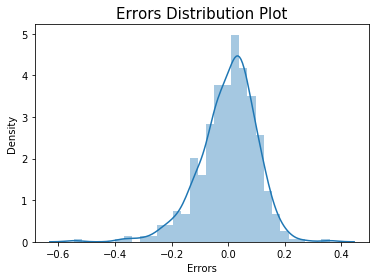

In [87]:
sns.distplot(ytrain - ytrainpred)
plt.title("Errors Distribution Plot",size=15)
plt.xlabel("Errors")
plt.show()

# Step 7: Prediction

In [88]:

# # columns which required scaling
# Xtestcol = list(df[['temp','hum','windspeed','cnt']].columns)
# Xtestcol

In [89]:
# Xtest[Xtestcol] = sc.transform(Xtest[Xtestcol])

In [90]:
Xtest.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,...,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,yr_2019,weathersit_clear,weathersit_cloudy,weathersit_light_rain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.059091,...,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.481818,0.654545,0.318182,0.027273
std,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.236333,...,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.500809,0.476601,0.466833,0.163248
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
holiday                  220 non-null int64
workingday               220 non-null int64
temp                     220 non-null float64
hum                      220 non-null float64
windspeed                220 non-null float64
cnt                      220 non-null float64
season_spring            220 non-null uint8
season_summer            220 non-null uint8
season_winter            220 non-null uint8
mnth_aug                 220 non-null uint8
mnth_dec                 220 non-null uint8
mnth_feb                 220 non-null uint8
mnth_jan                 220 non-null uint8
mnth_jul                 220 non-null uint8
mnth_jun                 220 non-null uint8
mnth_mar                 220 non-null uint8
mnth_may                 220 non-null uint8
mnth_nov                 220 non-null uint8
mnth_oct                 220 non-null uint8
mnth_sep                 220 non-null uint8
weekd

In [92]:
# ytest = Xtest.cnt
# Xtest = Xtest.drop('cnt', axis=1)

ytest = Xtest.pop('cnt')
Xtest = Xtest

In [93]:
ytest.shape

(220,)

In [94]:
Xtest.shape

(220, 29)

In [95]:
Xtest.describe()

,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,...,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,yr_2019,weathersit_clear,weathersit_cloudy,weathersit_light_rain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.640909,0.558718,0.638221,0.313293,0.254545,0.263636,0.236364,0.059091,0.086364,...,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.481818,0.654545,0.318182,0.027273
std,0.187620,0.480828,0.233187,0.148694,0.159584,0.436599,0.441609,0.425817,0.236333,0.281541,...,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.500809,0.476601,0.466833,0.163248
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.529197,0.198843,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558172,0.625590,0.300126,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.755981,0.743798,0.402718,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
#dropping un-necessary columns ; similar to train set

Xtest = Xtest[Xtrain_rfe.columns]
Xtest_sm = sm.add_constant(Xtest)

In [97]:
#prediction
ytestpred = lm.predict(Xtest_sm)

In [98]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest, ytestpred)


n = Xtest.shape[0]
p = Xtest.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R Square          :',r2)
print('Adjusted R Square :',adjusted_r2)

R Square          : 0.7894686258488164
Adjusted R Square : 0.77618266534413
